# Multi-Armed Bandit Problem Implementation-GaussianBandit

Hui Wang--PKU 20240924

Task Description:

Implement UCB (Upper Confidence Bound) and e-Greedy algorithms for a multi-armed bandit problem with k=15 arms.
Each arm's reward follows a Gaussian distribution with means ranging from 1 to 15 and a standard deviation of 1.
Provide a Python program that implements both algorithms and plots their performance comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Environment

In [2]:
import numpy as np

class GaussianBandit:
    """Gaussian Multi-Armed Bandit, input K represents the number of levers"""
    
    def __init__(self, K, stddev=1.0):
        self.K = K  # Number of arms
        self.means = np.arange(1, K+1)  # Means of the arms, starting from 1 to K
        self.stddev = stddev  # Standard deviation of the normal distribution
    
    def step(self, k):
        # Return a sample from the normal distribution with mean 'means[k]' and standard deviation 'stddev'
        return np.random.normal(self.means[k], self.stddev)

In [3]:
# Set the random seed for reproducibility
np.random.seed(1)

# Define the number of arms (levers)
K = 15

# Create an instance of the GaussianBandit class with 15 arms
gaussian_bandit_15_arm = GaussianBandit(K=15)

# Simulate pulling the 15th arm (index 14, since indexing starts at 0)
reward = gaussian_bandit_15_arm.step(14)

# Print the reward obtained from pulling the 15th arm
print(reward)

16.62434536366324


## Solver

In [4]:
import numpy as np

class GaussianSolver:
    """Basic framework for multi-armed bandit algorithms."""
    
    def __init__(self, bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)  # Number of times each lever has been pulled
        self.regret = 0.  # Cumulative regret at the current step
        self.reward = 0.  # Cumulative reward at the current step
        self.actions = []  # List to store actions at each step
        self.regrets = []  # List to store cumulative regrets at each step
        self.rewards = []  # List to store average rewards after each step
        
    def update_regret(self, k):
        # Calculate and save the cumulative regret, where k is the lever number chosen in this action
        self.regret += self.bandit.K - k
        self.regrets.append(self.regret)
    
    def update_reward(self, r, i):
        self.reward += r
        self.rewards.append(self.reward / int(i + 1))
    
    def run_one_step(self):
        # Return which lever to pull in the current action, implemented by each specific strategy
        raise NotImplementedError
    
    def run(self, num_steps):
        # Run for a certain number of times, num_steps is the total number of runs
        for i in range(num_steps):
            k, r = self.run_one_step()
            self.counts[k] += 1
            self.actions.append(k)
            self.update_regret(k)
            self.update_reward(r, i)

## Policy

1. epsilon-greedy

1.1. epsilon=0.01

In [5]:
import numpy as np

class GaussianEpsilonGreedy(GaussianSolver):
    """Epsilon-greedy algorithm for Gaussian bandits, inheriting from GaussianSolver class."""
    
    def __init__(self, bandit, epsilon=0.01, init_prob=1.0):
        super(GaussianEpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon  # Probability of choosing a random action
        # Initialize the estimated expected rewards for all levers
        self.estimates = np.array([init_prob] * self.bandit.K)
    
    def run_one_step(self):
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)  # Randomly choose a lever
        else:
            k = np.argmax(self.estimates)  # Choose the lever with the highest estimated expected reward
            
        r = self.bandit.step(k)  # Get the reward for this action
        
        # Update the estimate for the chosen lever
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        return k, r

In [6]:
def plot_results_regrets(solvers, solver_names):
    # Iterate over each solver in the list of solvers
    for idx, solver in enumerate(solvers):
        # Create a list of time steps for the x-axis
        time_list = range(len(solver.regrets))
        # Plot the cumulative regrets for the current solver
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    
    # Set the x-axis label
    plt.xlabel('Time steps')
    # Set the y-axis label
    plt.ylabel('Cumulative regrets')
    # Set the title of the plot
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    # Display the legend with solver names
    plt.legend()
    # Show the plot
    plt.show()

In [7]:
def plot_results_rewards(solvers, solver_names):
    # Iterate over each solver in the list of solvers
    for idx, solver in enumerate(solvers):
        # Create a list of time steps for the x-axis
        time_list = range(len(solver.rewards))
        # Plot the average rewards for the current solver
        plt.plot(time_list, solver.rewards, label=solver_names[idx])
    
    # Set the x-axis label
    plt.xlabel('Time steps')
    # Set the y-axis label
    plt.ylabel('Average rewards')
    # Set the title of the plot
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    # Display the legend with solver names
    plt.legend()
    # Show the plot
    plt.show()

Cumulative regrets: 12459.0


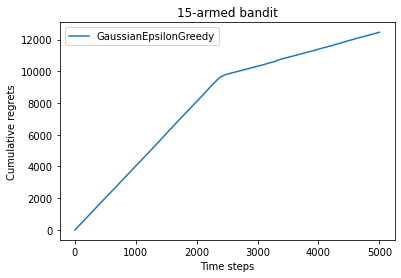

In [8]:
# Create an instance of the GaussianEpsilonGreedy solver with the GaussianBandit
epsilon_greedy_solver = GaussianEpsilonGreedy(gaussian_bandit_15_arm, epsilon=0.01)

# Run the solver for 5000 steps
epsilon_greedy_solver.run(5000)

# Print the final cumulative regret
print('Cumulative regret is:', epsilon_greedy_solver.regret)

# Plot the cumulative regrets for the epsilon-greedy solver
plot_results_regrets([epsilon_greedy_solver], ["GaussianEpsilonGreedy"])

Average rewards: 14.630517339133776


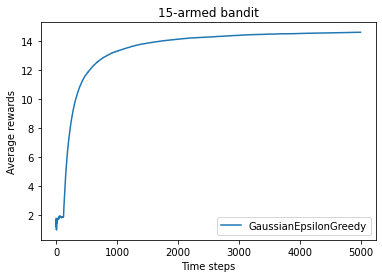

In [9]:
# Create an instance of the GaussianEpsilonGreedy solver with the GaussianBandit
epsilon_greedy_solver = GaussianEpsilonGreedy(gaussian_bandit_15_arm, epsilon=0.01)

# Run the solver for 5000 steps
epsilon_greedy_solver.run(5000)

# Print the final average reward
print('Average reward is:', epsilon_greedy_solver.rewards[-1])

# Plot the average rewards for the epsilon-greedy solver
plot_results_rewards([epsilon_greedy_solver], ["GaussianEpsilonGreedy"])

1.2. Different Epsilon value

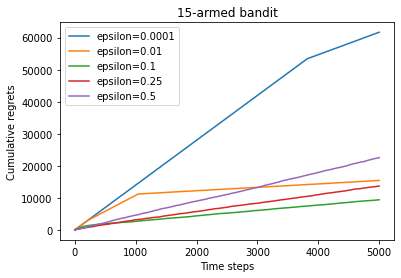

In [10]:
# Define a list of epsilon values to test
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]

# Create a list of epsilon-greedy solvers with different epsilon values
epsilon_greedy_solver_list = [GaussianEpsilonGreedy(gaussian_bandit_15_arm, epsilon=e) for e in epsilons]

# Create a list of solver names with their corresponding epsilon values
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]

# Run each solver for 5000 steps
for solver in epsilon_greedy_solver_list:
    solver.run(5000)

# Plot the cumulative regrets for all epsilon-greedy solvers
plot_results_regrets(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

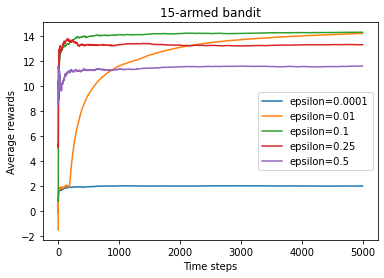

In [11]:
# Define a list of epsilon values to test
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]

# Create a list of epsilon-greedy solvers with different epsilon values
epsilon_greedy_solver_list = [GaussianEpsilonGreedy(gaussian_bandit_15_arm, epsilon=e) for e in epsilons]

# Create a list of solver names with their corresponding epsilon values
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]

# Run each solver for 5000 steps
for solver in epsilon_greedy_solver_list:
    solver.run(5000)

# Plot the average rewards for all epsilon-greedy solvers
plot_results_rewards(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

1.3. Epsilon value decaying over time

In [12]:
class GaussianDecayingEpsilonGreedy(GaussianSolver):
    """Epsilon-greedy algorithm with a decaying epsilon value, inheriting from GaussianSolver class."""
    
    def __init__(self, bandit, init_prob=1.0):
        super(GaussianDecayingEpsilonGreedy, self).__init__(bandit)
        self.estimates = np.array([init_prob] * self.bandit.K)  # Initialize the estimated expected rewards for all levers
        self.total_count = 0  # Initialize a counter for the total number of steps taken
    
    def run_one_step(self):
        self.total_count += 1  # Increment the total step count
        self.choice_bar = 1 / self.total_count  # Calculate the decaying epsilon value
        
        if np.random.random() < self.choice_bar:  # If a random number is less than the decaying epsilon value
            k = np.random.randint(0, self.bandit.K)  # Randomly choose a lever
        else:
            k = np.argmax(self.estimates)  # Choose the lever with the highest estimated expected reward
            
        r = self.bandit.step(k)  # Get the reward for this action
        
        # Update the estimate for the chosen lever
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        
        return k, r

Cumulative regrets: 10111.0


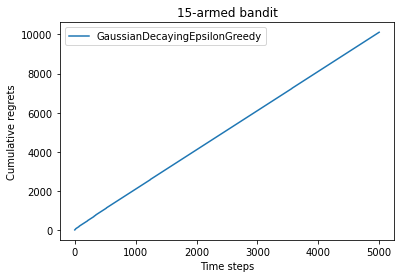

Average rewards: 13.96795570558963


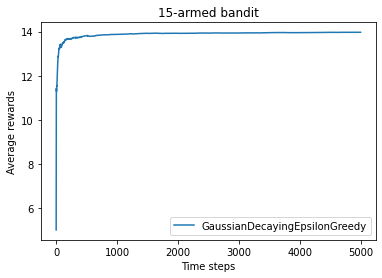

In [13]:
# Create an instance of the GaussianDecayingEpsilonGreedy solver with the GaussianBandit
decaying_epsilon_greedy_solver = GaussianDecayingEpsilonGreedy(gaussian_bandit_15_arm)

# Run the solver for 5000 steps
decaying_epsilon_greedy_solver.run(5000)

# Print the final cumulative regret
print('Cumulative regrets:', decaying_epsilon_greedy_solver.regret)

# Plot the cumulative regrets for the decaying epsilon-greedy solver
plot_results_regrets([decaying_epsilon_greedy_solver], ["GaussianDecayingEpsilonGreedy"])

# Print the final average reward
print('Average rewards:', decaying_epsilon_greedy_solver.rewards[-1])

# Plot the average rewards for the decaying epsilon-greedy solver
plot_results_rewards([decaying_epsilon_greedy_solver], ["GaussianDecayingEpsilonGreedy"])

1.4. UCB(Upper confidence bound)

In [14]:
class UCB(GaussianSolver):
    """Upper Confidence Bound (UCB) algorithm, inheriting from GaussianSolver class."""
    
    def __init__(self, bandit, coef, init_prob=1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0  # Initialize a counter for the total number of steps taken
        self.estimates = np.array([init_prob] * self.bandit.K)  # Initialize the estimated expected rewards for all levers
        self.coef = coef  # Coefficient for the UCB formula
    
    def run_one_step(self):
        self.total_count += 1  # Increment the total step count
        # Calculate the UCB (Upper Confidence Bound) for each lever
        ucb = (self.estimates 
               + self.coef * np.sqrt(np.log(self.total_count) / (2 * (self.counts + 1))))
        # Choose the lever with the highest UCB value
        k = np.argmax(ucb)
        r = self.bandit.step(k)  # Get the reward for this action
        # Update the estimate for the chosen lever
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        
        return k, r

Cumulative regrets: 6081.0


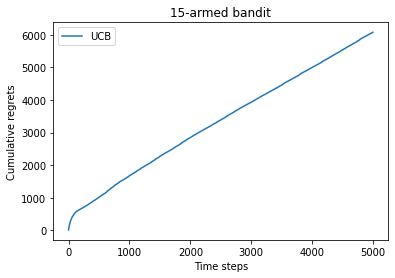

Average rewards： 14.778606602486915


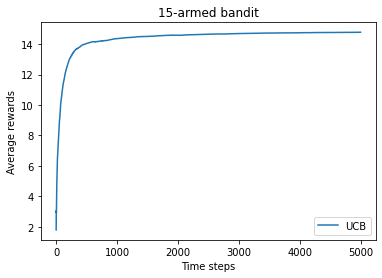

In [15]:
# Define the coefficient that controls the trade-off between exploration and exploitation
coef = 10

# Create an instance of the UCB solver with the GaussianBandit
UCB_solver = UCB(gaussian_bandit_15_arm, coef)

# Run the solver for 5000 steps
UCB_solver.run(5000)

# Print the final cumulative regret
print('Cumulative regrets:', UCB_solver.regret)

# Plot the cumulative regrets for the UCB solver
plot_results_regrets([UCB_solver], ["UCB"])

# Print the final average reward
print('Average rewards：', UCB_solver.rewards[-1])

# Plot the average rewards for the UCB solver
plot_results_rewards([UCB_solver], ["UCB"])

## UCB vs. Epsilon-Greedy

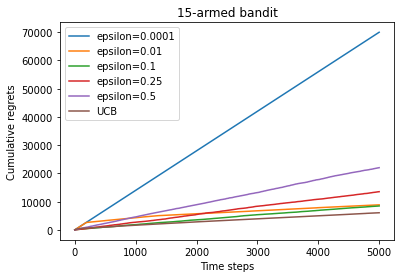

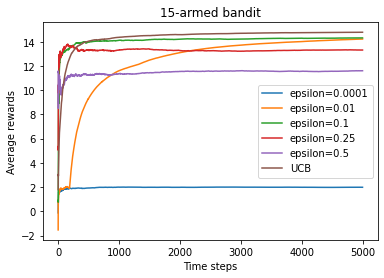

In [16]:
# Combine the solver lists
solver_list = epsilon_greedy_solver_list + [UCB_solver]

# Combine the solver names
solver_names = epsilon_greedy_solver_names + ["UCB"]

# Plot the average regrets and rewards for all solvers
plot_results_regrets(solver_list, solver_names)
plot_results_rewards(solver_list, solver_names)